In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from bs4 import BeautifulSoup
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.0 MB/s eta 0:00:00


In [ ]:
import csv
df = pd.read_csv("survey_results_public.csv")

In [ ]:
df.head()
col=['Country', 'Age', 'Gender','EdLevel','LearnCode','YearsCode','YearsCodePro',
     'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'OrgSize',
     'ConvertedCompYearly','Employment'	,'RemoteWork',
]


In [ ]:
survey_df = df[col].copy()
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   LearnCode               71580 non-null  object 
 5   YearsCode               71331 non-null  object 
 6   YearsCodePro            51833 non-null  object 
 7   LanguageHaveWorkedWith  70975 non-null  object 
 8   LanguageWantToWorkWith  67027 non-null  object 
 9   OrgSize                 51039 non-null  object 
 10  ConvertedCompYearly     38071 non-null  float64
 11  Employment              71709 non-null  object 
 12  RemoteWork              58958 non-null  object 
dtypes: float64(1), object(12)
memory usage: 7.3+ MB


In [ ]:
survey_df.isnull().sum()/len(df)*100

Country                    2.043184
Age                        3.169187
Gender                     3.296118
EdLevel                    2.316154
LearnCode                  2.303871
YearsCode                  2.643719
YearsCodePro              29.255610
LanguageHaveWorkedWith     3.129606
LanguageWantToWorkWith     8.518043
OrgSize                   30.339302
ConvertedCompYearly       48.038707
Employment                 2.127805
RemoteWork                19.531037
dtype: float64

In [ ]:
survey_df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '50'}, inplace=True)

In [ ]:
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')

In [ ]:
survey_df.describe()

,YearsCode,YearsCodePro,ConvertedCompYearly
count,69746.000000,51833.000000,3.807100e+04
mean,12.403951,9.909479,1.707613e+05
std,9.722896,8.708362,7.814132e+05
min,1.000000,0.000000,1.000000e+00
25%,5.000000,4.000000,3.583200e+04
50%,10.000000,7.000000,6.784500e+04
75%,17.000000,14.000000,1.200000e+05
max,50.000000,50.000000,5.000000e+07


In [ ]:
survey_df.isnull().sum()/len(df)*100

Country                    2.043184
Age                        3.169187
Gender                     3.296118
EdLevel                    2.316154
LearnCode                  2.303871
YearsCode                  4.807010
YearsCodePro              29.255610
LanguageHaveWorkedWith     3.129606
LanguageWantToWorkWith     8.518043
OrgSize                   30.339302
ConvertedCompYearly       48.038707
Employment                 2.127805
RemoteWork                19.531037
dtype: float64

In [ ]:
survey_df.where(~(survey_df.Gender.str.contains(';|:', na=False)), np.nan, inplace=True)
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Name: Gender, dtype: int64

In [ ]:
# fill missing value
survey_df['YearsCode']=survey_df['YearsCode'].fillna(survey_df['YearsCode'].mean())
survey_df['YearsCodePro']=survey_df['YearsCodePro'].fillna(survey_df['YearsCodePro'].mean())
mode_value = survey_df['OrgSize'].mode()[0]
survey_df['OrgSize'].fillna(mode_value, inplace=True)
modeval = survey_df['RemoteWork'].mode()[0]
survey_df['RemoteWork'].fillna(modeval, inplace=True)

In [ ]:
survey_df.isnull().sum()/len(df)*100

Country                    3.368456
Age                        4.479445
Gender                     4.621390
EdLevel                    3.640061
LearnCode                  3.619588
YearsCode                  0.000000
YearsCodePro               0.000000
LanguageHaveWorkedWith     4.423486
LanguageWantToWorkWith     9.743681
OrgSize                    0.000000
ConvertedCompYearly       48.609215
Employment                 3.448982
RemoteWork                 0.000000
dtype: float64

In [ ]:
survey_df = survey_df.dropna()
(survey_df.isnull().sum())*100/len(survey_df)

Country                   0.0
Age                       0.0
Gender                    0.0
EdLevel                   0.0
LearnCode                 0.0
YearsCode                 0.0
YearsCodePro              0.0
LanguageHaveWorkedWith    0.0
LanguageWantToWorkWith    0.0
OrgSize                   0.0
ConvertedCompYearly       0.0
Employment                0.0
RemoteWork                0.0
dtype: float64

### EDA

In [ ]:
# distribution of developer by age

age_data = survey_df['Age'].value_counts().reset_index()
age_data.columns = ['Age', 'Number of Respondents']

fig = px.bar(age_data, x='Age', y='Number of Respondents',
             labels={'Number of Respondents': 'Number of Respondents', 'Age': 'Age'},
             color='Age', title='Distribution of Developers by Age')
fig.update_traces(hovertemplate='Age: %{x}<br>Respondents: %{y}', showlegend=False)

fig.show()

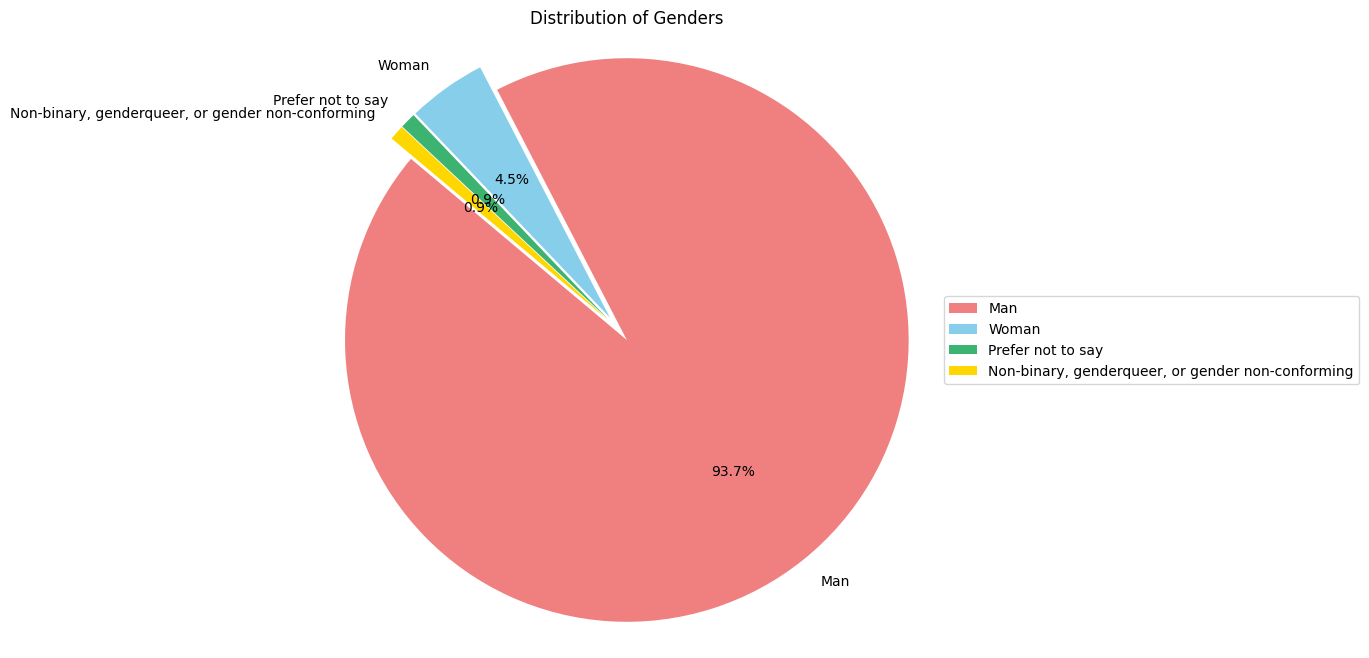

In [ ]:
#  distribution of developer by gender
gender_data = survey_df['Gender'].value_counts()
explode = (0.05, 0.05, 0.05, 0.05)
colors = ['lightcoral', 'SkyBlue','mediumseagreen', 'gold']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
ax.axis('equal')
plt.title('Distribution of Genders')
plt.legend(gender_data.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
top10_country = survey_df['Country'].value_counts().head(10)

top10_country = top10_country.rename({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'Britain'
})
top10_country_df = pd.DataFrame({'Country': top10_country.index, 'Number of Respondents': top10_country.values})
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'lightpink', 'lightgrey']
fig = px.bar(top10_country_df, x='Country', y='Number of Respondents', title='Top 10 Countries by Number of Respondents')
fig.update_traces(marker_color=colors)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

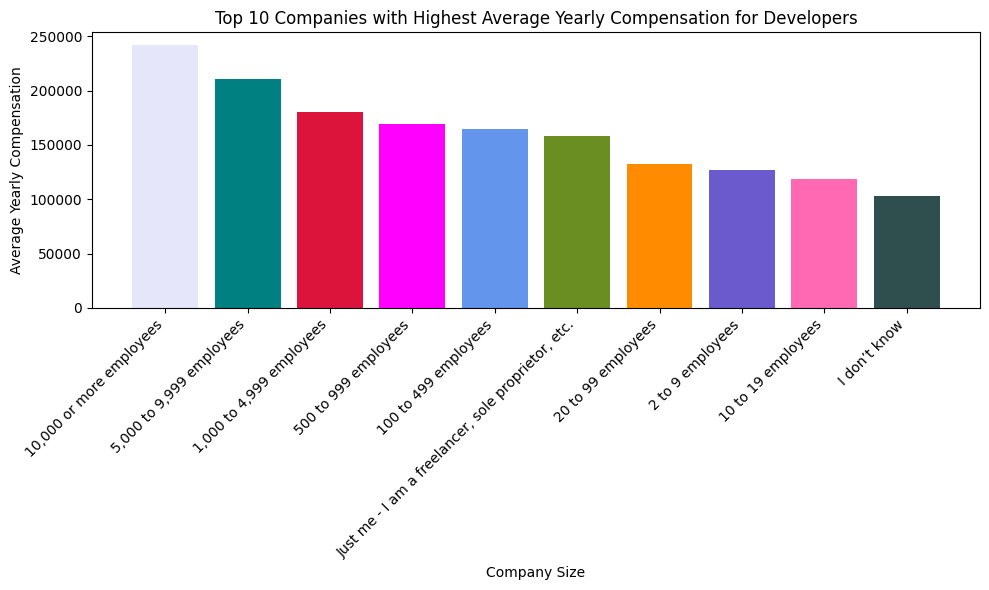

In [ ]:
# find the top 10 companies where developers get paid the most
highest_paid_companies = survey_df.groupby('OrgSize')['ConvertedCompYearly'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
colors = ['lavender', 'teal', 'crimson', 'magenta', 'cornflowerblue', 'olivedrab', 'darkorange', 'slateblue', 'hotpink', 'darkslategray']
plt.bar(highest_paid_companies.index, highest_paid_companies.values, color=colors)
plt.xlabel('Company Size')
plt.ylabel('Average Yearly Compensation')
plt.title('Top 10 Companies with Highest Average Yearly Compensation for Developers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# top 5 popular methods of learning to code
survey_df['LearnCode'] = survey_df['LearnCode'].str.replace(r'\s*\([^()]*\)', '', regex=True)
learning_methods = survey_df['LearnCode'].value_counts().head(5)
learning_methods_df = pd.DataFrame({'Learning Methods': learning_methods.index, 'Number of Respondents': learning_methods.values})
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'lightpink', 'lightgrey']
fig = px.bar(learning_methods_df, x='Learning Methods', y='Number of Respondents', title='Top 5 Popular Methods of Learning to Code')
fig.update_traces(marker_color=colors)
fig.update_layout(xaxis={'categoryorder': 'total descending'}, height=800, width=1000)
fig.show()

In [ ]:
# whether possessing a Master's degree increases the probability of securing employment
employed_full_time = survey_df[df['Employment'] == 'Employed, full-time']
masters_employed = employed_full_time[employed_full_time['EdLevel'].str.contains("Master", na=False)]
no_masters_employed = employed_full_time[~employed_full_time['EdLevel'].str.contains("Master", na=False)]
total_employed = len(employed_full_time)
percentage_masters = len(masters_employed) / total_employed * 100
percentage_no_masters = len(no_masters_employed) / total_employed * 100

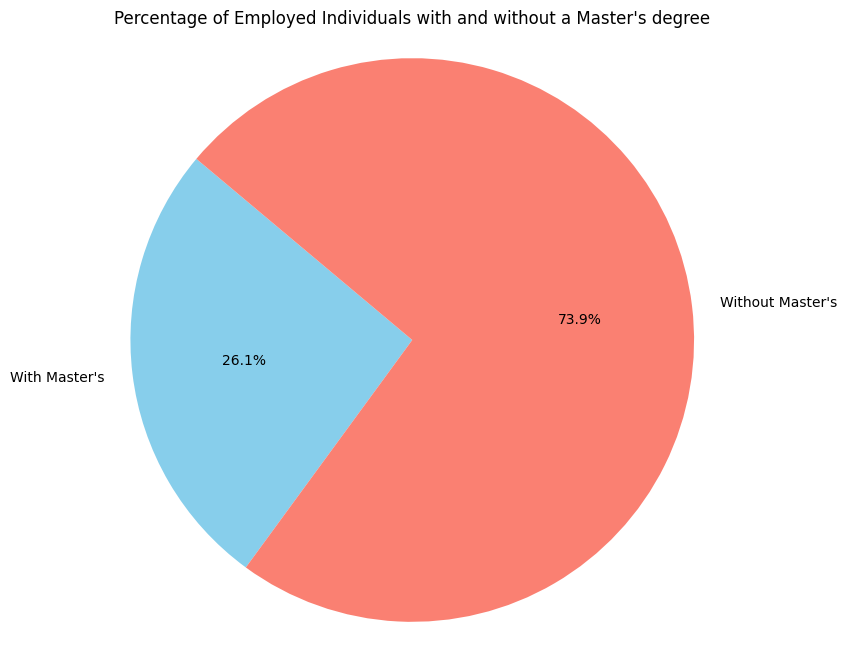

In [ ]:
labels = ['With Master\'s', 'Without Master\'s']
sizes = [percentage_masters, percentage_no_masters]
colors = ['skyblue', 'salmon']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Employed Individuals with and without a Master\'s degree')
plt.axis('equal')
plt.show()


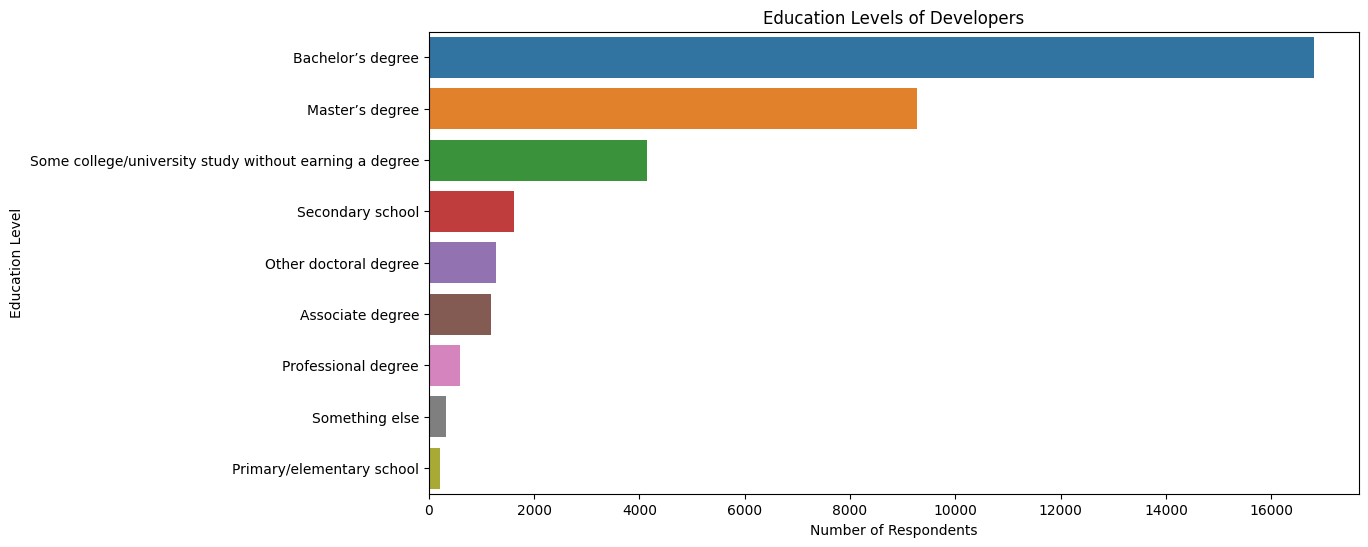

In [ ]:
# level of education among respondents
survey_df['EdLevel'] = survey_df['EdLevel'].str.replace(r'\s*\([^()]*\)', '', regex=True)
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=survey_df['EdLevel'], order=survey_df['EdLevel'].value_counts().index)
total = len(survey_df['EdLevel'])
plt.title("Education Levels of Developers")
plt.xlabel('Number of Respondents')
plt.ylabel('Education Level')
plt.show()

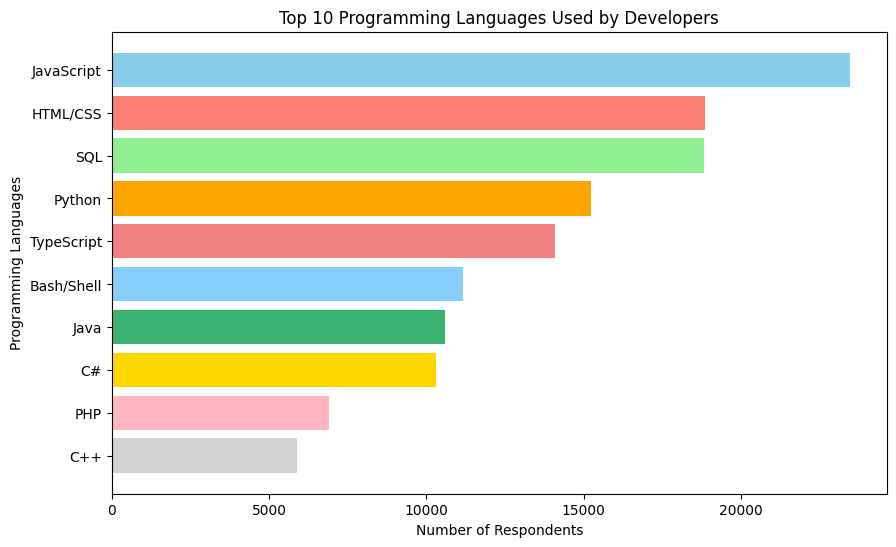

In [ ]:
# top 10 programming languages used by developers based on the survey

languages = survey_df['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
language_counts = Counter(languages)
top_languages = language_counts.most_common(10)

plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'lightpink', 'lightgrey']
languages_df = pd.DataFrame(top_languages, columns=['Language', 'Count'])
plt.barh(languages_df['Language'], languages_df['Count'], color=colors)
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Languages')
plt.title('Top 10 Programming Languages Used by Developers')
plt.gca().invert_yaxis()
plt.show()


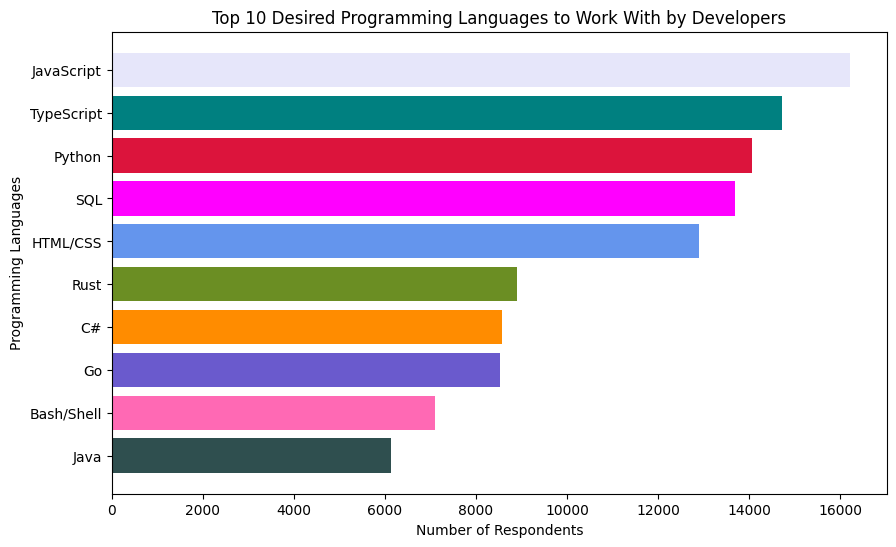

In [ ]:
# top 10 desired programming languages that developers want to work with based on the survey

desired_languages = survey_df['LanguageWantToWorkWith'].dropna().str.split(';', expand=True).stack()
desired_language_counts = Counter(desired_languages)
top_desired_languages = desired_language_counts.most_common(10)

plt.figure(figsize=(10, 6))
desired_languages_df = pd.DataFrame(top_desired_languages, columns=['Language', 'Count'])
colors = ['lavender', 'teal', 'crimson', 'magenta', 'cornflowerblue', 'olivedrab', 'darkorange', 'slateblue', 'hotpink', 'darkslategray']
plt.barh(desired_languages_df['Language'], desired_languages_df['Count'], color= colors)
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Languages')
plt.title('Top 10 Desired Programming Languages to Work With by Developers')
plt.gca().invert_yaxis()
plt.show()


<Figure size 2200x1800 with 0 Axes>

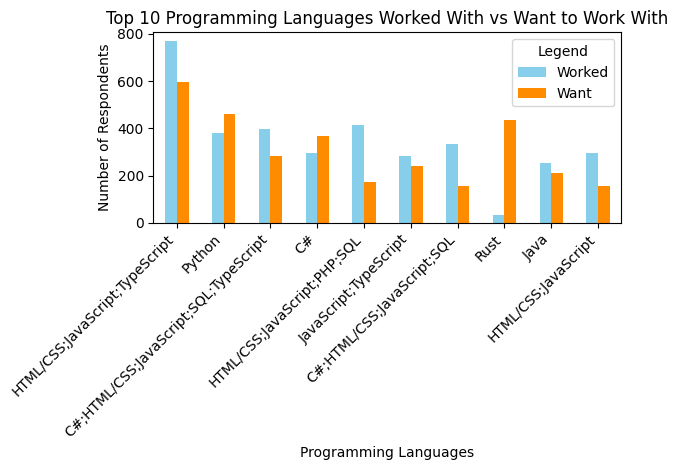

In [ ]:
# developers languages they have worked with and they want to work with
languages_worked = Counter(','.join(survey_df['LanguageHaveWorkedWith'].dropna()).split(','))
languages_want = Counter(','.join(survey_df['LanguageWantToWorkWith'].dropna()).split(','))

# Create DataFrames from language counts
languages_worked_df = pd.DataFrame.from_dict(languages_worked, orient='index', columns=['Worked'])
languages_want_df = pd.DataFrame.from_dict(languages_want, orient='index', columns=['Want'])

# Join the DataFrames to compare worked with wanted languages
language_df = languages_worked_df.join(languages_want_df, how='outer')

# Sort by the count of languages worked with
language_df['Total'] = language_df['Worked'] + language_df['Want']
language_df = language_df.sort_values(by='Total', ascending=False).head(10)
plt.figure(figsize=(22, 18))
colors = ['skyblue', 'darkorange']
language_df[['Worked', 'Want']].plot(kind='bar', stacked=False, width=0.5, color=colors)
plt.title('Top 10 Programming Languages Worked With vs Want to Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Legend', labels=['Worked', 'Want'])
plt.tight_layout()
plt.show()

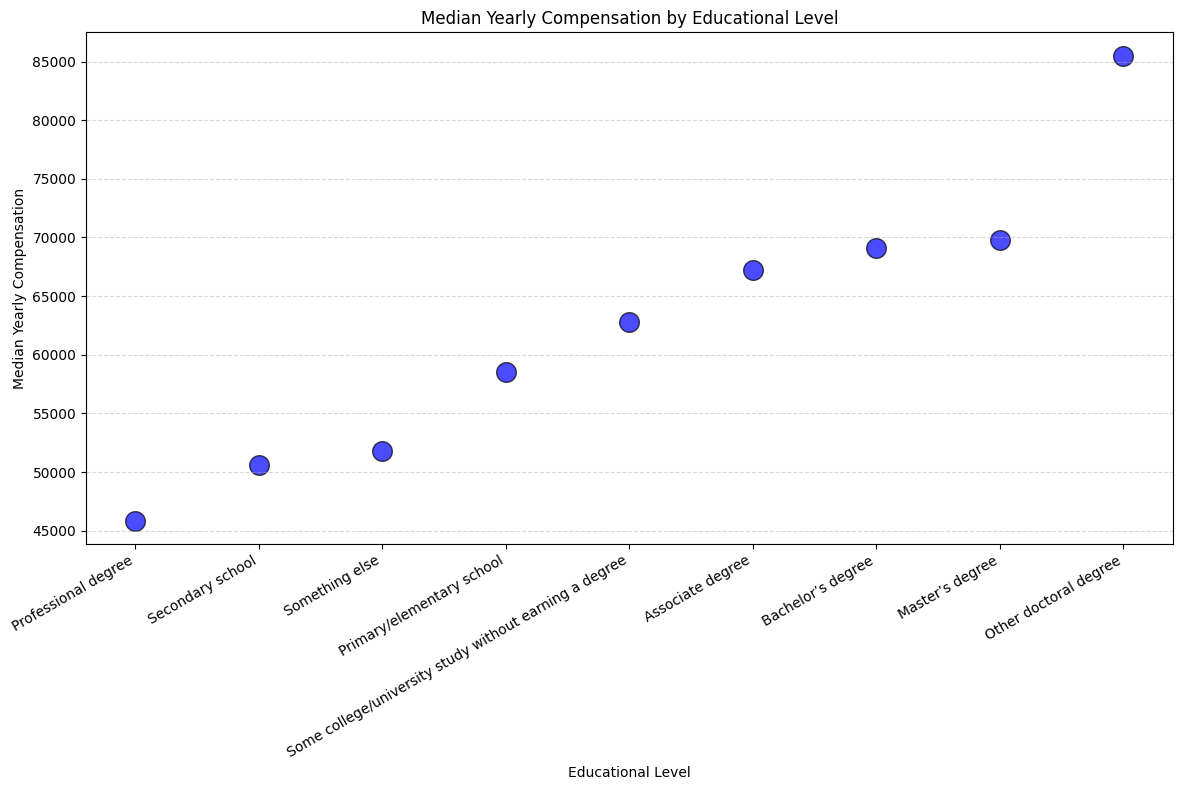

In [ ]:
# salary based on education level
survey_df['EdLevel'] = survey_df['EdLevel'].str.split('\(').str[0]
median_salary = survey_df.groupby('EdLevel')['ConvertedCompYearly'].agg(median_salary='median').reset_index()
median_salary = median_salary.sort_values(by='median_salary')
plt.figure(figsize=(12, 8))
plt.scatter(median_salary['EdLevel'], median_salary['median_salary'], s=200, c='blue', alpha=0.7, marker='o', edgecolors='black')
plt.title('Median Yearly Compensation by Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

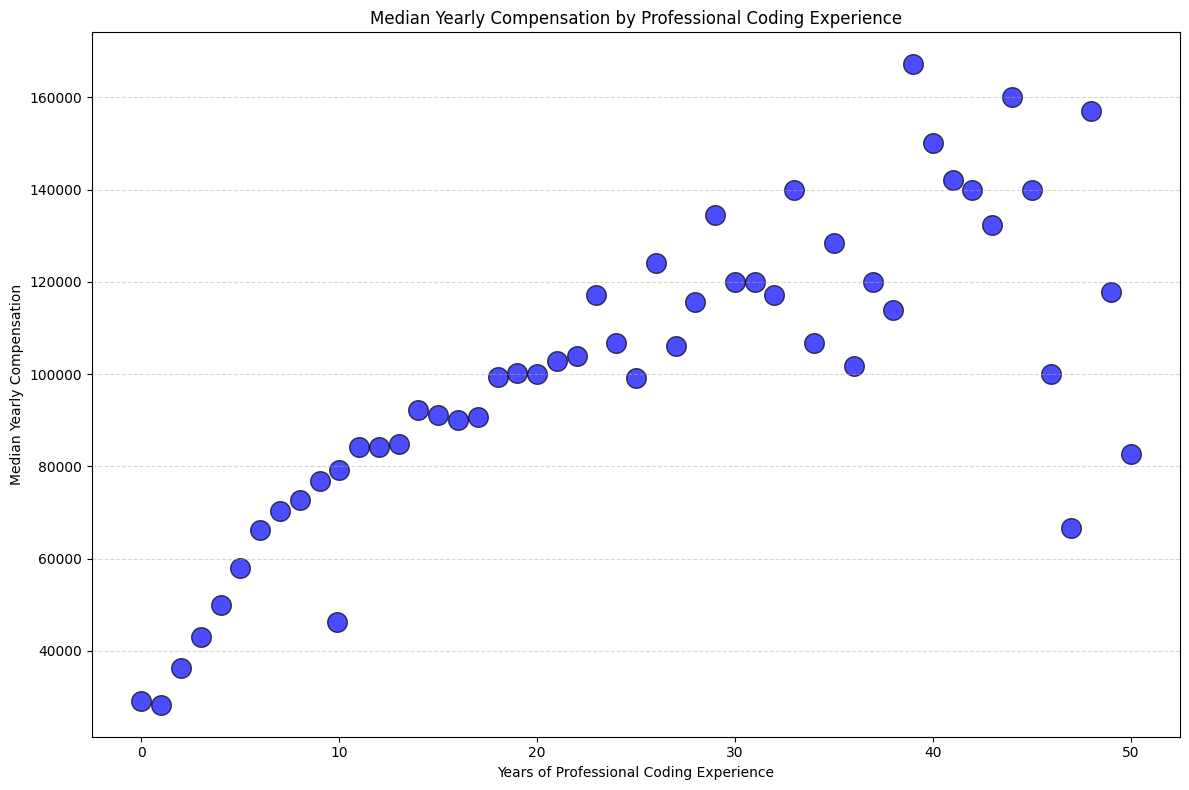

In [ ]:
# median yearly compensation by professional coding experience

median_comp = survey_df.groupby('YearsCodePro')['ConvertedCompYearly'].median().reset_index()
median_comp = median_comp.sort_values(by='YearsCodePro')
plt.figure(figsize=(12, 8))
plt.scatter(data=median_comp, x='YearsCodePro', y='ConvertedCompYearly', s=200, c='blue', alpha=0.7, marker='o', edgecolors='black')
plt.title('Median Yearly Compensation by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Yearly Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

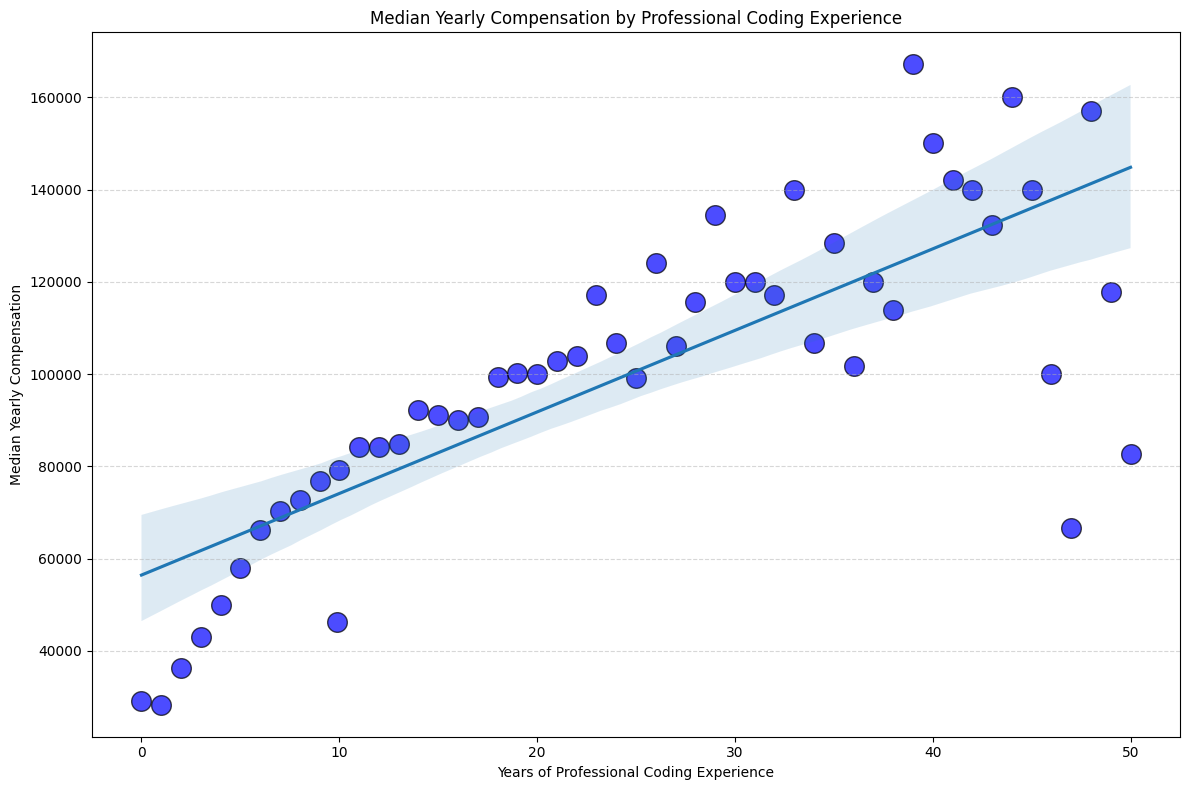

In [ ]:
# median yearly compensation by professional coding experience
median_comp = survey_df.groupby('YearsCodePro')['ConvertedCompYearly'].median().reset_index()
median_comp = median_comp.sort_values(by='YearsCodePro')
plt.figure(figsize=(12, 8))
sns.regplot(data=median_comp, x='YearsCodePro', y='ConvertedCompYearly', scatter_kws={'s': 200, 'alpha': 0.7, 'color': 'blue', 'edgecolors': 'black'})
plt.title('Median Yearly Compensation by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Yearly Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# work environment
remote_work_percentage = df['RemoteWork'].dropna().value_counts(normalize=True) * 100
remote_work_percentage_df = pd.DataFrame({'Work Enviornment': remote_work_percentage.index, 'Percentage': remote_work_percentage.values})
colors = ['skyblue', 'salmon', 'lightgreen']
fig = px.bar(remote_work_percentage_df, x='Work Enviornment', y='Percentage', title='Distribution of Work Environments')
fig.update_traces(marker_color=colors)
fig.update_layout(xaxis={'categoryorder': 'total descending'}, height=600, width=800)
fig.show()

The analysis of the Stack Overflow Annual Developer Survey presents compelling insights into the demographics and professional dynamics within the field. A notable portion of surveyed developers falls between the ages of 25 to 34, showing their significant presence in this field. Yet, it's clear that most survey respondents are men, highlighting an imbalance in the gender representation among developers. Furthermore, the survey received substantial contributions from the United States, indicating robust engagement from this particular region.

The results shed light on how most developers gained their coding skills through formal education, notably from schools or universities, highlighting the importance of traditional learning paths. Surprisingly, having a Master's degree isn't necessarily a requirement for employment, as many developers secured roles with only a Bachelor's degree. The data also suggests a possible connection between the size of the company and salary, with developers in larger organizations often earning higher wages. JavaScript emerges as the top programming language among respondents and remains the most desired language to work with. Moreover, the analysis indicates that salaries tend to rise with higher levels of education, with those holding doctoral degrees receiving the highest compensation. Concurrently, the data underscores a positive correlation between yearly compensation and years of professional coding experience, indicating a rise in salaries as developers gain more experience.

Furthermore, the survey indicates a rising trend in remote or hybrid work setups among developers, signaling an increasing acceptance of flexible work arrangements in the industry.
